In [7]:
pip install --upgrade tensorflow keras


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# **Preprocessing of Abnormal(Ulcer)**

**Load dataset**

In [2]:
pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Mubasher Manzoor\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
# Train Abnormal Images
import os
import cv2

# Define the directory containing the images
data_dir = "Original Images/Abnormal"

# List all image files in the directory
image_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.jpg')]

# Load an example image
example_image = cv2.imread(image_files[0])


**Resize Images**

In [4]:
import cv2
import os
import glob
import numpy as np

# Directory containing the original images
folder_path = "Original Images/Abnormal"

# Directory to save the resized images
save_directory = "resized_images_of_Abnormal"

# Create the directory if it doesn't exist
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Function to resize an image to square (by padding) and maintain aspect ratio
def resize_to_square(image, size):
    old_size = image.shape[:2]  # Get current image size (height, width)
    
    # Calculate the ratio of the new size to the old size
    ratio = float(size) / max(old_size)
    
    # Compute the new dimensions while maintaining the aspect ratio
    new_size = tuple([int(x * ratio) for x in old_size])
    
    # Resize the image
    resized_image = cv2.resize(image, (new_size[1], new_size[0]))
    
    # Create a new square image with padding
    delta_w = size - new_size[1]
    delta_h = size - new_size[0]
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)
    
    # Pad the image with black pixels (or use a different color if desired)
    color = [0, 0, 0]
    squared_image = cv2.copyMakeBorder(resized_image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    
    return squared_image

# Resize images to this size
target_size = 224

# Get the list of all image files in the folder
image_files = glob.glob(os.path.join(folder_path, "*.jpg"))

# Check the number of images
num_images = len(image_files)
print("Number of images:", num_images)

# Initialize an empty list to hold the images as a 4D array
image_sequence = []

# Process and resize each image
for idx, image_path in enumerate(image_files):
    image = cv2.imread(image_path)
    
    # Resize the image to square
    squared_image = resize_to_square(image, target_size)
    
    # Save the resized image
    save_path = os.path.join(save_directory, f"resized_image_{idx}.jpg")
    cv2.imwrite(save_path, squared_image)
    print(f"Saved resized image to {save_path}")
    
    # Add the image to the sequence (converting to a 4D array)
    # The image has shape (Height, Width, Channels) - we add a new dimension (for time/frame)
    squared_image_4d = np.expand_dims(squared_image, axis=0)  # Add new axis at the beginning
    image_sequence.append(squared_image_4d)

# Convert the list of images to a 4D numpy array (Time Steps x Height x Width x Channels)
image_sequence_4d = np.concatenate(image_sequence, axis=0)
print(f"Shape of the final 4D image array: {image_sequence_4d.shape}")

# Example output to verify: (Number of images, Height, Width, Channels)
# E.g., (Number of images, 224, 224, 3)

# Verifying the dimensions of the resized images
resized_image_files = glob.glob(os.path.join(save_directory, "*.jpg"))
example_image = cv2.imread(resized_image_files[0])
image_height, image_width, channels = example_image.shape
print("Example resized image dimensions:", image_height, "x", image_width)
print("Number of channels:", channels)

# Loop through all images and verify their dimensions
all_images_same_size = True
for image_path in resized_image_files:
    image = cv2.imread(image_path)
    if image.shape != (image_height, image_width, channels):
        all_images_same_size = False
        break

if all_images_same_size:
    print("All resized images have the same dimensions.")
else:
    print("Some resized images have different dimensions.")


Number of images: 1038
Saved resized image to resized_images_of_Abnormal\resized_image_0.jpg
Saved resized image to resized_images_of_Abnormal\resized_image_1.jpg
Saved resized image to resized_images_of_Abnormal\resized_image_2.jpg
Saved resized image to resized_images_of_Abnormal\resized_image_3.jpg
Saved resized image to resized_images_of_Abnormal\resized_image_4.jpg
Saved resized image to resized_images_of_Abnormal\resized_image_5.jpg
Saved resized image to resized_images_of_Abnormal\resized_image_6.jpg
Saved resized image to resized_images_of_Abnormal\resized_image_7.jpg
Saved resized image to resized_images_of_Abnormal\resized_image_8.jpg
Saved resized image to resized_images_of_Abnormal\resized_image_9.jpg
Saved resized image to resized_images_of_Abnormal\resized_image_10.jpg
Saved resized image to resized_images_of_Abnormal\resized_image_11.jpg
Saved resized image to resized_images_of_Abnormal\resized_image_12.jpg
Saved resized image to resized_images_of_Abnormal\resized_image_

**Visualization**

In [5]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Mubasher Manzoor\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


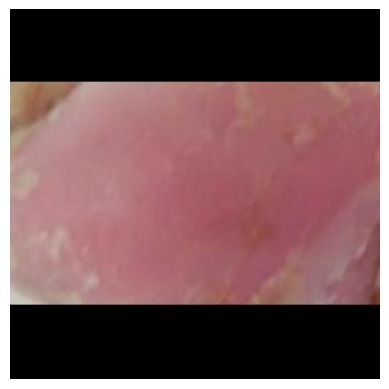

In [6]:
import matplotlib.pyplot as plt

# Visualize a sample image
plt.imshow(cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

**Distribution of classes**

In [7]:
# Assuming you have a list of labels for each image
labels = [...]

from collections import Counter

# Count the occurrences of each label
label_counts = Counter(labels)

print("Class Distribution:")
print(label_counts)

Class Distribution:
Counter({Ellipsis: 1})


**Image Statistics**

In [8]:
import numpy as np

# Compute statistics
mean_pixel = np.mean(example_image)
std_pixel = np.std(example_image)

print("Mean pixel value:", mean_pixel)
print("Standard deviation of pixel values:", std_pixel)

Mean pixel value: 79.67447252338435
Standard deviation of pixel values: 69.28162534668098


**Normalization**

In [9]:
import numpy as np

# Example: Assuming example_image is your image array
mean_pixel = np.mean(example_image)
std_pixel = np.std(example_image)

# Normalize the image
normalized_image = (example_image - mean_pixel) / std_pixel

# Print the results
print("Mean pixel value:", mean_pixel)
print("Standard deviation of pixel values:", std_pixel)

# If you want to check the normalized image statistics
print("Normalized image mean:", np.mean(normalized_image))
print("Normalized image std:", np.std(normalized_image))

Mean pixel value: 79.67447252338435
Standard deviation of pixel values: 69.28162534668098
Normalized image mean: -2.718913529694261e-17
Normalized image std: 1.0000000000000002


**Data Preprocessing**

In [10]:
# Example: Resize images to a common size
target_size = (100, 100)
resized_image = cv2.resize(example_image, target_size)
print(resized_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


**Color Distribution**

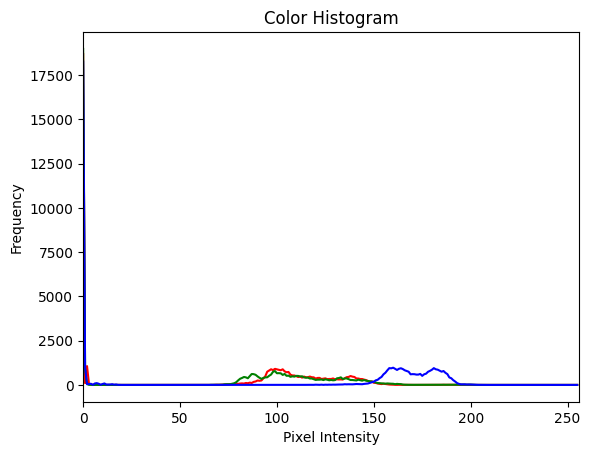

In [11]:
# Plot histograms for RGB channels
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    hist = cv2.calcHist([example_image], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Color Histogram')
plt.show()

**Feature Extraction**

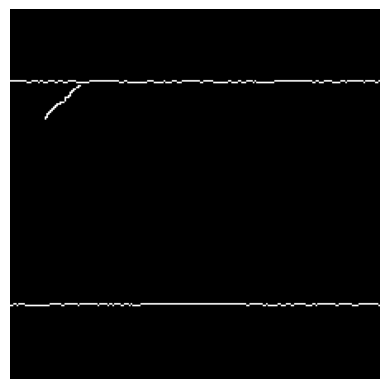

In [12]:
# Example: Edge detection
edges = cv2.Canny(example_image, 100, 200)
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

**Dimensionality Reduction**

In [13]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Mubasher Manzoor\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


C:\Users\Mubasher Manzoor\AppData\Local\Temp\ipykernel_8124\3778998753.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', cmap='viridis')


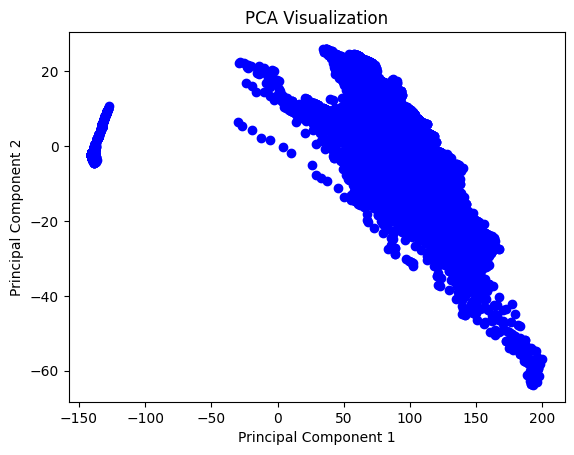

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have 'flattened_images' and 'labels' defined earlier

# Reshape images to vectors
flattened_images = example_image.reshape(-1, example_image.shape[-1])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_images)

# Plotting the PCA results
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()


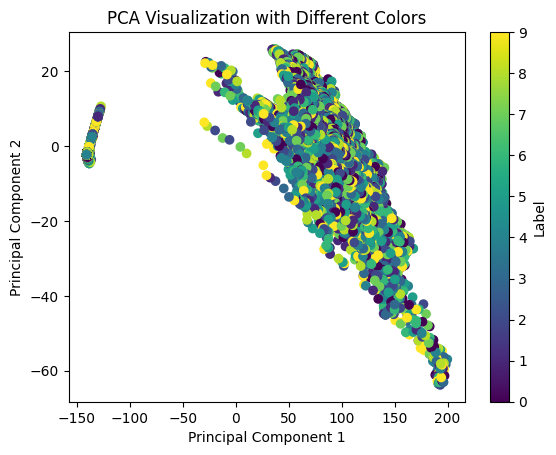

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have 'flattened_images' and 'labels' defined earlier

# Reshape images to vectors
flattened_images = example_image.reshape(-1, example_image.shape[-1])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_images)

# Assuming 'labels' is a list or array of numeric values
# If 'labels' is not defined, replace it with the appropriate variable containing the labels
labels = np.random.randint(0, 10, size=len(pca_result))  # Example: random labels for demonstration

# Plotting the PCA results with different colors based on 'labels'
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis')
plt.colorbar(label='Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization with Different Colors')
plt.show()

**Corelation Analysis**

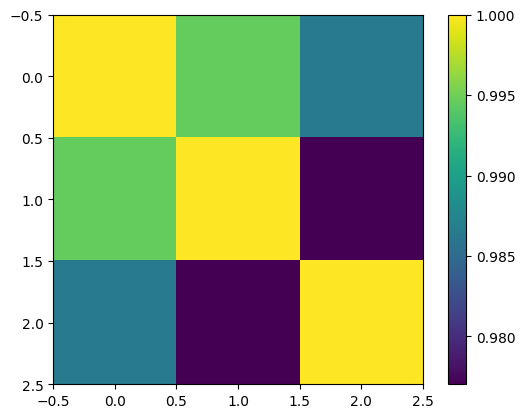

In [16]:
# Example: Compute correlation matrix
correlation_matrix = np.corrcoef(flattened_images.T)
plt.imshow(correlation_matrix, cmap='viridis')
plt.colorbar()
plt.show()

**Outlier Detection**

In [17]:
# Example: Z-score outlier detection
z_scores = (flattened_images - mean_pixel) / std_pixel
outliers = np.where(np.abs(z_scores) > 3)

print("Outlier indices:", outliers)

Outlier indices: (array([], dtype=int64), array([], dtype=int64))


**Label Analysis**

In [18]:
# Example: Check for unique labels
unique_labels = set(labels)
print("Unique labels:", unique_labels)

Unique labels: {np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9)}


# **Preprocessing of Normal(Healthy skin)**

**Load Dataset**

In [19]:
# Train Normal Images
import os
import cv2

# Define the directory containing the images
data_dir = "Original Images/Normal"

# List all image files in the directory
image_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.jpg')]

# Load an example image
example_image = cv2.imread(image_files[0])


**Resize Images**

In [20]:
import cv2
import os
import glob
import numpy as np

# Directory containing the original images
folder_path = "Original Images/Normal"

# Directory to save the resized images
save_directory = "resized_images_of_Normal"

# Create the directory if it doesn't exist
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Function to resize an image to square (by padding) and maintain aspect ratio
def resize_to_square(image, size):
    old_size = image.shape[:2]  # Get current image size (height, width)
    
    # Calculate the ratio of the new size to the old size
    ratio = float(size) / max(old_size)
    
    # Compute the new dimensions while maintaining the aspect ratio
    new_size = tuple([int(x * ratio) for x in old_size])
    
    # Resize the image
    resized_image = cv2.resize(image, (new_size[1], new_size[0]))
    
    # Create a new square image with padding
    delta_w = size - new_size[1]
    delta_h = size - new_size[0]
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)
    
    # Pad the image with black pixels (or use a different color if desired)
    color = [0, 0, 0]
    squared_image = cv2.copyMakeBorder(resized_image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    
    return squared_image

# Resize images to this size
target_size = 224

# Get the list of all image files in the folder
image_files = glob.glob(os.path.join(folder_path, "*.jpg"))

# Check the number of images
num_images = len(image_files)
print("Number of images:", num_images)

# Initialize an empty list to hold the images as a 4D array
image_sequence = []

# Process and resize each image
for idx, image_path in enumerate(image_files):
    image = cv2.imread(image_path)
    
    # Resize the image to square
    squared_image = resize_to_square(image, target_size)
    
    # Save the resized image
    save_path = os.path.join(save_directory, f"resized_image_{idx}.jpg")
    cv2.imwrite(save_path, squared_image)
    print(f"Saved resized image to {save_path}")
    
    # Add the image to the sequence (converting to a 4D array)
    # The image has shape (Height, Width, Channels) - we add a new dimension (for time/frame)
    squared_image_4d = np.expand_dims(squared_image, axis=0)  # Add new axis at the beginning
    image_sequence.append(squared_image_4d)

# Convert the list of images to a 4D numpy array (Time Steps x Height x Width x Channels)
image_sequence_4d = np.concatenate(image_sequence, axis=0)
print(f"Shape of the final 4D image array: {image_sequence_4d.shape}")

# Example output to verify: (Number of images, Height, Width, Channels)
# E.g., (Number of images, 224, 224, 3)

# Verifying the dimensions of the resized images
resized_image_files = glob.glob(os.path.join(save_directory, "*.jpg"))
example_image = cv2.imread(resized_image_files[0])
image_height, image_width, channels = example_image.shape
print("Example resized image dimensions:", image_height, "x", image_width)
print("Number of channels:", channels)

# Loop through all images and verify their dimensions
all_images_same_size = True
for image_path in resized_image_files:
    image = cv2.imread(image_path)
    if image.shape != (image_height, image_width, channels):
        all_images_same_size = False
        break

if all_images_same_size:
    print("All resized images have the same dimensions.")
else:
    print("Some resized images have different dimensions.")


Number of images: 641
Saved resized image to resized_images_of_Normal\resized_image_0.jpg
Saved resized image to resized_images_of_Normal\resized_image_1.jpg
Saved resized image to resized_images_of_Normal\resized_image_2.jpg
Saved resized image to resized_images_of_Normal\resized_image_3.jpg
Saved resized image to resized_images_of_Normal\resized_image_4.jpg
Saved resized image to resized_images_of_Normal\resized_image_5.jpg
Saved resized image to resized_images_of_Normal\resized_image_6.jpg
Saved resized image to resized_images_of_Normal\resized_image_7.jpg
Saved resized image to resized_images_of_Normal\resized_image_8.jpg
Saved resized image to resized_images_of_Normal\resized_image_9.jpg
Saved resized image to resized_images_of_Normal\resized_image_10.jpg
Saved resized image to resized_images_of_Normal\resized_image_11.jpg
Saved resized image to resized_images_of_Normal\resized_image_12.jpg
Saved resized image to resized_images_of_Normal\resized_image_13.jpg
Saved resized image to

**Visualization**

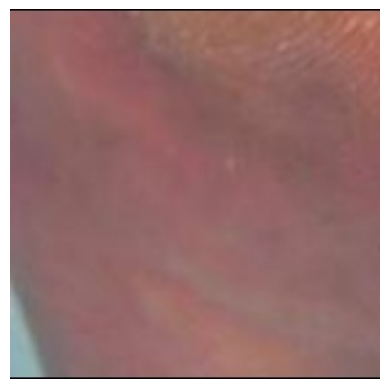

In [21]:
import matplotlib.pyplot as plt

# Visualize a sample image
plt.imshow(cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

**Distribition Of Classes**

In [22]:
# Assuming you have a list of labels for each image
labels = [...]

from collections import Counter

# Count the occurrences of each label
label_counts = Counter(labels)

print("Class Distribution:")
print(label_counts)

Class Distribution:
Counter({Ellipsis: 1})


**Image Statistics**

In [23]:
import numpy as np
# Compute statistics
mean_pixel = np.mean(example_image)
std_pixel = np.std(example_image)

print("Mean pixel value:", mean_pixel)
print("Standard deviation of pixel values:", std_pixel)

Mean pixel value: 116.35340268920068
Standard deviation of pixel values: 25.026447139423208


**Normalization**

In [24]:
import numpy as np

# Example: Assuming example_image is your image array
mean_pixel = np.mean(example_image)
std_pixel = np.std(example_image)

# Normalize the image
normalized_image = (example_image - mean_pixel) / std_pixel

# Print the results
print("Mean pixel value:", mean_pixel)
print("Standard deviation of pixel values:", std_pixel)

# If you want to check the normalized image statistics
print("Normalized image mean:", np.mean(normalized_image))
print("Normalized image std:", np.std(normalized_image))

Mean pixel value: 116.35340268920068
Standard deviation of pixel values: 25.026447139423208
Normalized image mean: 8.911994347331189e-17
Normalized image std: 1.0


**Data Preprocessing**

In [25]:
# Example: Resize images to a common size
target_size = (100, 100)
resized_image = cv2.resize(example_image, target_size)
print(resized_image)

[[[ 65  67  93]
  [ 66  67  93]
  [ 66  67  93]
  ...
  [ 69  76 110]
  [ 68  75 109]
  [ 68  74 108]]

 [[103 102 151]
  [103 102 151]
  [105 102 151]
  ...
  [ 94 113 177]
  [ 98 116 180]
  [ 98 115 178]]

 [[100 101 151]
  [100 102 150]
  [102 102 150]
  ...
  [102 119 185]
  [106 122 189]
  [ 99 115 182]]

 ...

 [[180 172 142]
  [181 173 143]
  [182 175 142]
  ...
  [100 102 133]
  [100 102 132]
  [100 102 132]]

 [[176 172 138]
  [178 174 139]
  [177 176 139]
  ...
  [102 102 132]
  [101 101 131]
  [101 101 130]]

 [[112 106  92]
  [113 107  93]
  [114 108  94]
  ...
  [ 65  66  81]
  [ 64  66  81]
  [ 64  66  78]]]


**Color Distribution**

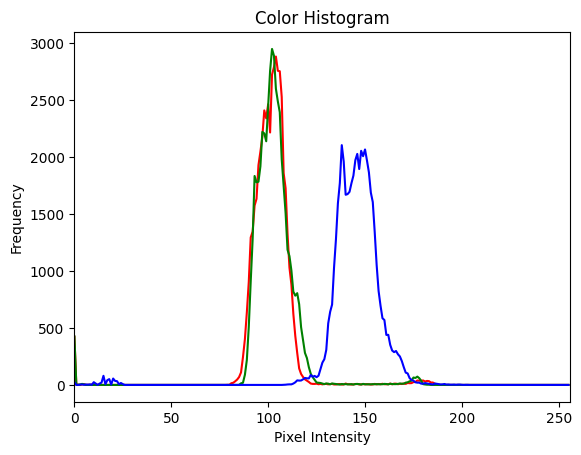

In [26]:
# Plot histograms for RGB channels
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    hist = cv2.calcHist([example_image], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Color Histogram')
plt.show()

**Feature Extraction**

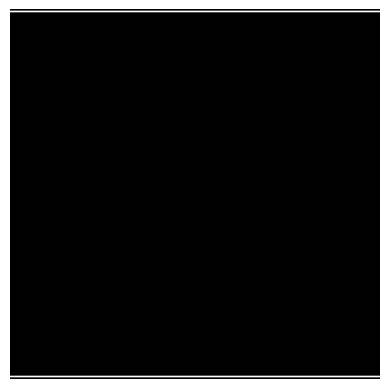

In [27]:
# Example: Edge detection
edges = cv2.Canny(example_image, 100, 200)
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

**Dimensionality Reduction**

C:\Users\Mubasher Manzoor\AppData\Local\Temp\ipykernel_8124\3554142027.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', cmap='viridis')


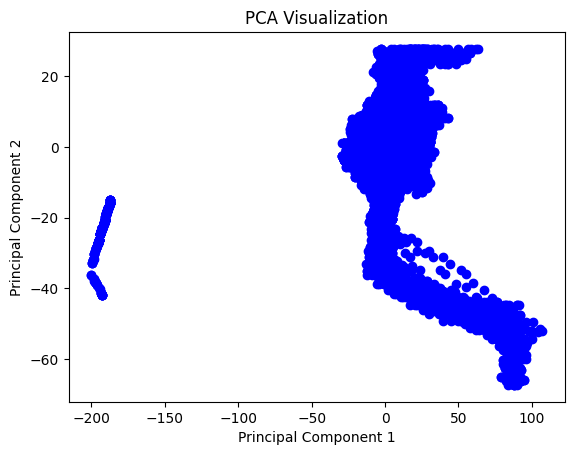

In [28]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have 'flattened_images' and 'labels' defined earlier

# Reshape images to vectors
flattened_images = example_image.reshape(-1, example_image.shape[-1])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_images)

# Plotting the PCA results
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()

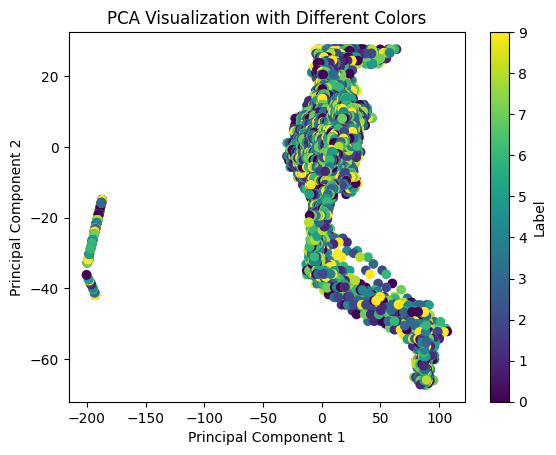

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have 'flattened_images' and 'labels' defined earlier

# Reshape images to vectors
flattened_images = example_image.reshape(-1, example_image.shape[-1])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_images)

# Assuming 'labels' is a list or array of numeric values
# If 'labels' is not defined, replace it with the appropriate variable containing the labels
labels = np.random.randint(0, 10, size=len(pca_result))  # Example: random labels for demonstration

# Plotting the PCA results with different colors based on 'labels'
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis')
plt.colorbar(label='Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization with Different Colors')
plt.show()

**Corelation Analysis**

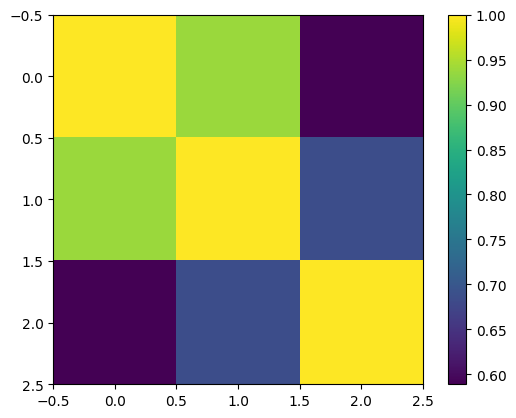

In [30]:
# Example: Compute correlation matrix
correlation_matrix = np.corrcoef(flattened_images.T)
plt.imshow(correlation_matrix, cmap='viridis')
plt.colorbar()
plt.show()

**Outlier Detection**

In [31]:
# Example: Z-score outlier detection
z_scores = (flattened_images - mean_pixel) / std_pixel
outliers = np.where(np.abs(z_scores) > 3)

print("Outlier indices:", outliers)

Outlier indices: (array([    0,     0,     0, ..., 50175, 50175, 50175]), array([0, 1, 2, ..., 0, 1, 2]))


Remove Outliers

In [32]:
# import numpy as np

# # Assuming 'images' is a 4D array with shape (batch_size, height, width, channels)
# # Example 4D image data: 10 RGB images of size 28x28
# images = np.random.rand(10, 28, 28, 3)

# # Calculate mean and std for Z-score normalization across all pixels
# mean_pixel = np.mean(images, axis=(0, 1, 2), keepdims=True)
# std_pixel = np.std(images, axis=(0, 1, 2), keepdims=True)

# # Z-score calculation (preserving 4D structure)
# z_scores = (images - mean_pixel) / std_pixel

# # Identify outliers (absolute Z-scores > 3)
# outliers = np.where(np.abs(z_scores) > 3)

# # Option 1: Replace outliers with the mean or median pixel value across entire dataset
# images[outliers] = mean_pixel  # You could also use np.median(images, axis=(0, 1, 2), keepdims=True)

# # Option 2: Drop the images containing outliers (not common for image data, but shown for reference)
# # unique_outlier_images = np.unique(outliers[0])
# # images = np.delete(images, unique_outlier_images, axis=0)

# # Output to verify
# print(f"After handling outliers, min pixel value: {images.min()}")
# print(f"After handling outliers, max pixel value: {images.max()}")


**Label Analysis**

In [33]:
# Example: Check for unique labels
unique_labels = set(labels)
print("Unique labels:", unique_labels)

Unique labels: {np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9)}


# **Preprocessing of Infection Positive**

**Load dataset**

In [34]:
# Train Infection Positive Images
import os
import cv2

# Define the directory containing the images
data_dir = "Original Images/Infection/Aug-Positive"

# List all image files in the directory
image_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.jpg')]

# Load an example image
example_image = cv2.imread(image_files[0])


**Resize Images**

In [35]:
import cv2
import os
import glob
import numpy as np

# Directory containing the original images
folder_path = "Original Images/Infection/Aug-Positive"

# Directory to save the resized images
save_directory = "resized_images_of_Infection"

# Create the directory if it doesn't exist
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Function to resize an image to square (by padding) and maintain aspect ratio
def resize_to_square(image, size):
    old_size = image.shape[:2]  # Get current image size (height, width)
    
    # Calculate the ratio of the new size to the old size
    ratio = float(size) / max(old_size)
    
    # Compute the new dimensions while maintaining the aspect ratio
    new_size = tuple([int(x * ratio) for x in old_size])
    
    # Resize the image
    resized_image = cv2.resize(image, (new_size[1], new_size[0]))
    
    # Create a new square image with padding
    delta_w = size - new_size[1]
    delta_h = size - new_size[0]
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)
    
    # Pad the image with black pixels (or use a different color if desired)
    color = [0, 0, 0]
    squared_image = cv2.copyMakeBorder(resized_image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    
    return squared_image

# Resize images to this size
target_size = 224

# Get the list of all image files in the folder
image_files = glob.glob(os.path.join(folder_path, "*.jpg"))

# Check the number of images
num_images = len(image_files)
print("Number of images:", num_images)

# Initialize an empty list to hold the images as a 4D array
image_sequence = []

# Process and resize each image
for idx, image_path in enumerate(image_files):
    image = cv2.imread(image_path)
    
    # Resize the image to square
    squared_image = resize_to_square(image, target_size)
    
    # Save the resized image
    save_path = os.path.join(save_directory, f"resized_image_{idx}.jpg")
    cv2.imwrite(save_path, squared_image)
    print(f"Saved resized image to {save_path}")
    
    # Add the image to the sequence (converting to a 4D array)
    # The image has shape (Height, Width, Channels) - we add a new dimension (for time/frame)
    squared_image_4d = np.expand_dims(squared_image, axis=0)  # Add new axis at the beginning
    image_sequence.append(squared_image_4d)

# Convert the list of images to a 4D numpy array (Time Steps x Height x Width x Channels)
image_sequence_4d = np.concatenate(image_sequence, axis=0)
print(f"Shape of the final 4D image array: {image_sequence_4d.shape}")

# Example output to verify: (Number of images, Height, Width, Channels)
# E.g., (Number of images, 224, 224, 3)

# Verifying the dimensions of the resized images
resized_image_files = glob.glob(os.path.join(save_directory, "*.jpg"))
example_image = cv2.imread(resized_image_files[0])
image_height, image_width, channels = example_image.shape
print("Example resized image dimensions:", image_height, "x", image_width)
print("Number of channels:", channels)

# Loop through all images and verify their dimensions
all_images_same_size = True
for image_path in resized_image_files:
    image = cv2.imread(image_path)
    if image.shape != (image_height, image_width, channels):
        all_images_same_size = False
        break

if all_images_same_size:
    print("All resized images have the same dimensions.")
else:
    print("Some resized images have different dimensions.")


Number of images: 2945
Saved resized image to resized_images_of_Infection\resized_image_0.jpg
Saved resized image to resized_images_of_Infection\resized_image_1.jpg
Saved resized image to resized_images_of_Infection\resized_image_2.jpg
Saved resized image to resized_images_of_Infection\resized_image_3.jpg
Saved resized image to resized_images_of_Infection\resized_image_4.jpg
Saved resized image to resized_images_of_Infection\resized_image_5.jpg
Saved resized image to resized_images_of_Infection\resized_image_6.jpg
Saved resized image to resized_images_of_Infection\resized_image_7.jpg
Saved resized image to resized_images_of_Infection\resized_image_8.jpg
Saved resized image to resized_images_of_Infection\resized_image_9.jpg
Saved resized image to resized_images_of_Infection\resized_image_10.jpg
Saved resized image to resized_images_of_Infection\resized_image_11.jpg
Saved resized image to resized_images_of_Infection\resized_image_12.jpg
Saved resized image to resized_images_of_Infection\

**Visualization**

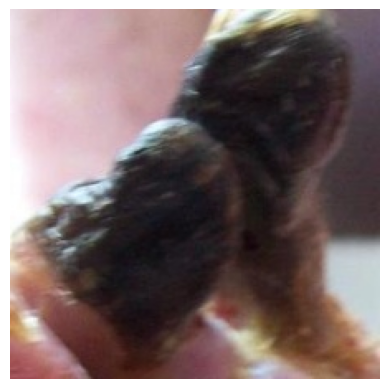

In [36]:
import matplotlib.pyplot as plt

# Visualize a sample image
plt.imshow(cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

**Distribution of classes**

In [37]:
# Assuming you have a list of labels for each image
labels = [...]

from collections import Counter

# Count the occurrences of each label
label_counts = Counter(labels)

print("Class Distribution:")
print(label_counts)

Class Distribution:
Counter({Ellipsis: 1})


**Image Statistics**

In [38]:
import numpy as np

# Compute statistics
mean_pixel = np.mean(example_image)
std_pixel = np.std(example_image)

print("Mean pixel value:", mean_pixel)
print("Standard deviation of pixel values:", std_pixel)

Mean pixel value: 102.3756709715136
Standard deviation of pixel values: 72.11851103728989


**Normalization**

In [39]:
import numpy as np

# Example: Assuming example_image is your image array
mean_pixel = np.mean(example_image)
std_pixel = np.std(example_image)

# Normalize the image
normalized_image = (example_image - mean_pixel) / std_pixel

# Print the results
print("Mean pixel value:", mean_pixel)
print("Standard deviation of pixel values:", std_pixel)

# If you want to check the normalized image statistics
print("Normalized image mean:", np.mean(normalized_image))
print("Normalized image std:", np.std(normalized_image))

Mean pixel value: 102.3756709715136
Standard deviation of pixel values: 72.11851103728989
Normalized image mean: 2.718913529694261e-17
Normalized image std: 0.9999999999999999


**Data Preprocessing**

In [40]:
# Example: Resize images to a common size
target_size = (100, 100)
resized_image = cv2.resize(example_image, target_size)
print(resized_image)

[[[228 221 234]
  [224 217 231]
  [219 213 228]
  ...
  [112  99 115]
  [109  96 112]
  [111  98 113]]

 [[230 223 236]
  [224 217 230]
  [220 213 229]
  ...
  [110  98 114]
  [111  97 113]
  [111  95 112]]

 [[234 225 238]
  [225 218 232]
  [218 212 227]
  ...
  [111  98 114]
  [110  94 111]
  [113  95 112]]

 ...

 [[ 85  81 157]
  [ 85  81 157]
  [ 82  77 156]
  ...
  [108 126 173]
  [119 135 176]
  [120 136 173]]

 [[ 82  78 154]
  [ 83  76 153]
  [ 86  80 159]
  ...
  [100 114 162]
  [110 123 167]
  [112 127 168]]

 [[ 90  84 163]
  [ 92  86 165]
  [ 89  83 162]
  ...
  [ 95 108 160]
  [102 116 165]
  [104 117 164]]]


**Color Distribution**

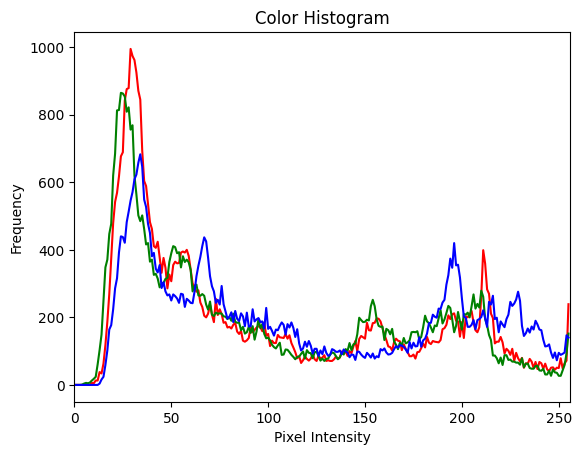

In [41]:
# Plot histograms for RGB channels
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    hist = cv2.calcHist([example_image], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Color Histogram')
plt.show()

**Feature Extraction**

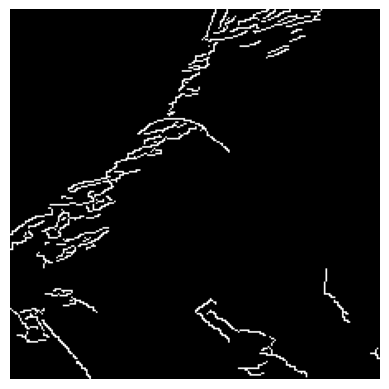

In [42]:
# Example: Edge detection
edges = cv2.Canny(example_image, 100, 200)
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

**Dimensionality Reduction**

C:\Users\Mubasher Manzoor\AppData\Local\Temp\ipykernel_8124\3778998753.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', cmap='viridis')


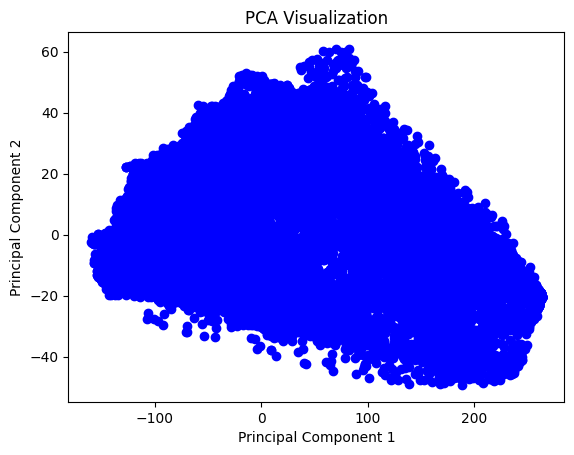

In [43]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have 'flattened_images' and 'labels' defined earlier

# Reshape images to vectors
flattened_images = example_image.reshape(-1, example_image.shape[-1])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_images)

# Plotting the PCA results
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()


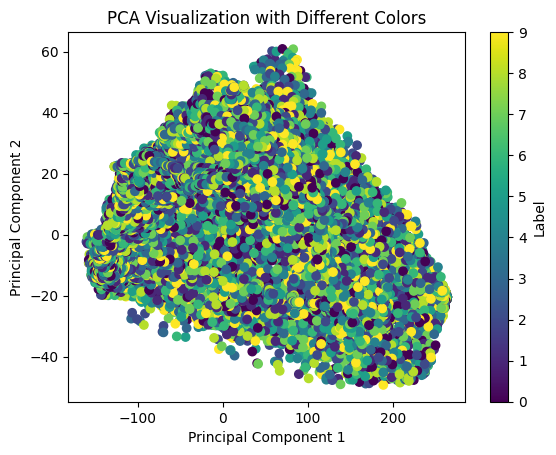

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have 'flattened_images' and 'labels' defined earlier

# Reshape images to vectors
flattened_images = example_image.reshape(-1, example_image.shape[-1])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_images)

# Assuming 'labels' is a list or array of numeric values
# If 'labels' is not defined, replace it with the appropriate variable containing the labels
labels = np.random.randint(0, 10, size=len(pca_result))  # Example: random labels for demonstration

# Plotting the PCA results with different colors based on 'labels'
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis')
plt.colorbar(label='Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization with Different Colors')
plt.show()

**Corelation Analysis**

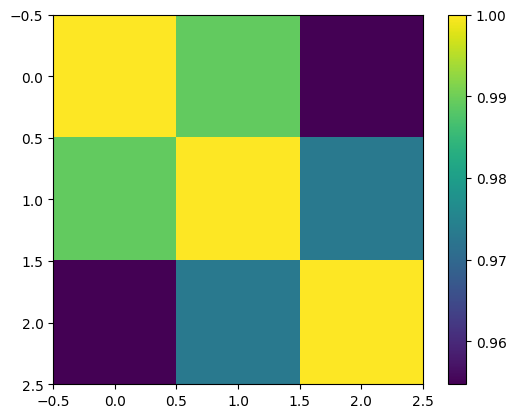

In [45]:
# Example: Compute correlation matrix
correlation_matrix = np.corrcoef(flattened_images.T)
plt.imshow(correlation_matrix, cmap='viridis')
plt.colorbar()
plt.show()

**Outlier Detection**

In [46]:
# Example: Z-score outlier detection
z_scores = (flattened_images - mean_pixel) / std_pixel
outliers = np.where(np.abs(z_scores) > 3)

print("Outlier indices:", outliers)

Outlier indices: (array([], dtype=int64), array([], dtype=int64))


**Label Analysis**

In [47]:
# Example: Check for unique labels
unique_labels = set(labels)
print("Unique labels:", unique_labels)

Unique labels: {np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9)}


# **Preprocessing of Ischaemia Positive**

**Load Dataset**

In [48]:
# Train Ischaemia positive Images
import os
import cv2

# Define the directory containing the images
data_dir = "Original Images/Ischaemia/Aug-Positive"

# List all image files in the directory
image_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.jpg')]

# Load an example image
example_image = cv2.imread(image_files[0])


**Resize Images**

In [49]:
import cv2
import os
import glob
import numpy as np

# Directory containing the original images
folder_path = "Original Images/Ischaemia/Aug-Positive"

# Directory to save the resized images
save_directory = "resized_images_of_Ischaemia"

# Create the directory if it doesn't exist
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Function to resize an image to square (by padding) and maintain aspect ratio
def resize_to_square(image, size):
    old_size = image.shape[:2]  # Get current image size (height, width)
    
    # Calculate the ratio of the new size to the old size
    ratio = float(size) / max(old_size)
    
    # Compute the new dimensions while maintaining the aspect ratio
    new_size = tuple([int(x * ratio) for x in old_size])
    
    # Resize the image
    resized_image = cv2.resize(image, (new_size[1], new_size[0]))
    
    # Create a new square image with padding
    delta_w = size - new_size[1]
    delta_h = size - new_size[0]
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)
    
    # Pad the image with black pixels (or use a different color if desired)
    color = [0, 0, 0]
    squared_image = cv2.copyMakeBorder(resized_image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    
    return squared_image

# Resize images to this size
target_size = 224

# Get the list of all image files in the folder
image_files = glob.glob(os.path.join(folder_path, "*.jpg"))

# Check the number of images
num_images = len(image_files)
print("Number of images:", num_images)

# Initialize an empty list to hold the images as a 4D array
image_sequence = []

# Process and resize each image
for idx, image_path in enumerate(image_files):
    image = cv2.imread(image_path)
    
    # Resize the image to square
    squared_image = resize_to_square(image, target_size)
    
    # Save the resized image
    save_path = os.path.join(save_directory, f"resized_image_{idx}.jpg")
    cv2.imwrite(save_path, squared_image)
    print(f"Saved resized image to {save_path}")
    
    # Add the image to the sequence (converting to a 4D array)
    # The image has shape (Height, Width, Channels) - we add a new dimension (for time/frame)
    squared_image_4d = np.expand_dims(squared_image, axis=0)  # Add new axis at the beginning
    image_sequence.append(squared_image_4d)

# Convert the list of images to a 4D numpy array (Time Steps x Height x Width x Channels)
image_sequence_4d = np.concatenate(image_sequence, axis=0)
print(f"Shape of the final 4D image array: {image_sequence_4d.shape}")

# Example output to verify: (Number of images, Height, Width, Channels)
# E.g., (Number of images, 224, 224, 3)

# Verifying the dimensions of the resized images
resized_image_files = glob.glob(os.path.join(save_directory, "*.jpg"))
example_image = cv2.imread(resized_image_files[0])
image_height, image_width, channels = example_image.shape
print("Example resized image dimensions:", image_height, "x", image_width)
print("Number of channels:", channels)

# Loop through all images and verify their dimensions
all_images_same_size = True
for image_path in resized_image_files:
    image = cv2.imread(image_path)
    if image.shape != (image_height, image_width, channels):
        all_images_same_size = False
        break

if all_images_same_size:
    print("All resized images have the same dimensions.")
else:
    print("Some resized images have different dimensions.")


Number of images: 4935
Saved resized image to resized_images_of_Ischaemia\resized_image_0.jpg
Saved resized image to resized_images_of_Ischaemia\resized_image_1.jpg
Saved resized image to resized_images_of_Ischaemia\resized_image_2.jpg
Saved resized image to resized_images_of_Ischaemia\resized_image_3.jpg
Saved resized image to resized_images_of_Ischaemia\resized_image_4.jpg
Saved resized image to resized_images_of_Ischaemia\resized_image_5.jpg
Saved resized image to resized_images_of_Ischaemia\resized_image_6.jpg
Saved resized image to resized_images_of_Ischaemia\resized_image_7.jpg
Saved resized image to resized_images_of_Ischaemia\resized_image_8.jpg
Saved resized image to resized_images_of_Ischaemia\resized_image_9.jpg
Saved resized image to resized_images_of_Ischaemia\resized_image_10.jpg
Saved resized image to resized_images_of_Ischaemia\resized_image_11.jpg
Saved resized image to resized_images_of_Ischaemia\resized_image_12.jpg
Saved resized image to resized_images_of_Ischaemia\

**Visualization**

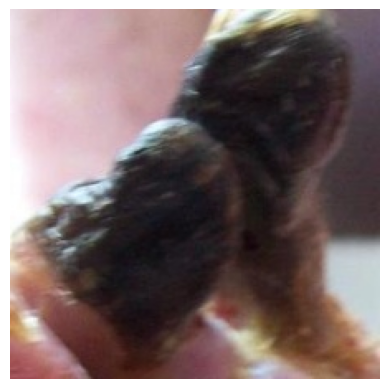

In [50]:
import matplotlib.pyplot as plt

# Visualize a sample image
plt.imshow(cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

**Distribition Of Classes**

In [51]:
# Assuming you have a list of labels for each image
labels = [...]

from collections import Counter

# Count the occurrences of each label
label_counts = Counter(labels)

print("Class Distribution:")
print(label_counts)

Class Distribution:
Counter({Ellipsis: 1})


**Image Statistics**

In [52]:
import numpy as np
# Compute statistics
mean_pixel = np.mean(example_image)
std_pixel = np.std(example_image)

print("Mean pixel value:", mean_pixel)
print("Standard deviation of pixel values:", std_pixel)

Mean pixel value: 102.3756709715136
Standard deviation of pixel values: 72.11851103728989


**Normalization**

In [53]:
import numpy as np

# Example: Assuming example_image is your image array
mean_pixel = np.mean(example_image)
std_pixel = np.std(example_image)

# Normalize the image
normalized_image = (example_image - mean_pixel) / std_pixel

# Print the results
print("Mean pixel value:", mean_pixel)
print("Standard deviation of pixel values:", std_pixel)

# If you want to check the normalized image statistics
print("Normalized image mean:", np.mean(normalized_image))
print("Normalized image std:", np.std(normalized_image))

Mean pixel value: 102.3756709715136
Standard deviation of pixel values: 72.11851103728989
Normalized image mean: 2.718913529694261e-17
Normalized image std: 0.9999999999999999


**Data Preprocessing**

In [54]:
# Example: Resize images to a common size
target_size = (100, 100)
resized_image = cv2.resize(example_image, target_size)
print(resized_image)

[[[228 221 234]
  [224 217 231]
  [219 213 228]
  ...
  [112  99 115]
  [109  96 112]
  [111  98 113]]

 [[230 223 236]
  [224 217 230]
  [220 213 229]
  ...
  [110  98 114]
  [111  97 113]
  [111  95 112]]

 [[234 225 238]
  [225 218 232]
  [218 212 227]
  ...
  [111  98 114]
  [110  94 111]
  [113  95 112]]

 ...

 [[ 85  81 157]
  [ 85  81 157]
  [ 82  77 156]
  ...
  [108 126 173]
  [119 135 176]
  [120 136 173]]

 [[ 82  78 154]
  [ 83  76 153]
  [ 86  80 159]
  ...
  [100 114 162]
  [110 123 167]
  [112 127 168]]

 [[ 90  84 163]
  [ 92  86 165]
  [ 89  83 162]
  ...
  [ 95 108 160]
  [102 116 165]
  [104 117 164]]]


**Color Distribution**

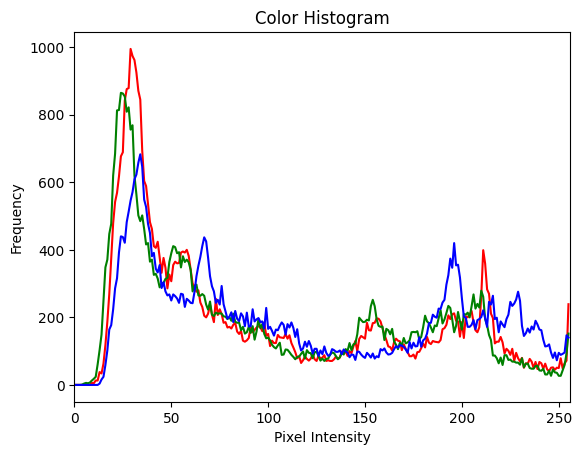

In [55]:
# Plot histograms for RGB channels
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    hist = cv2.calcHist([example_image], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Color Histogram')
plt.show()

**Feature Extraction**

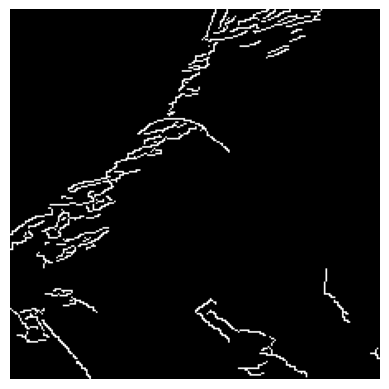

In [56]:
# Example: Edge detection
edges = cv2.Canny(example_image, 100, 200)
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

**Dimensionality Reduction**

C:\Users\Mubasher Manzoor\AppData\Local\Temp\ipykernel_8124\3554142027.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', cmap='viridis')


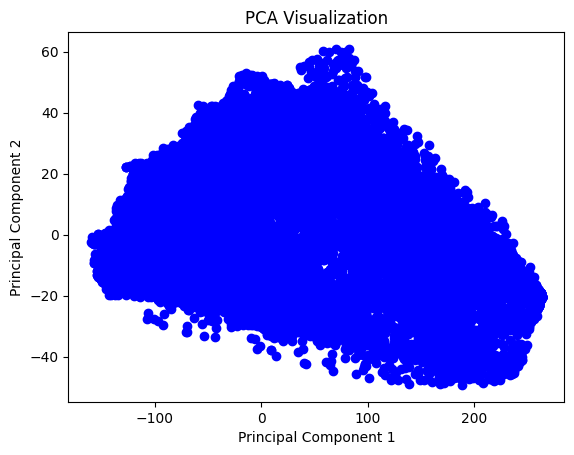

In [57]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have 'flattened_images' and 'labels' defined earlier

# Reshape images to vectors
flattened_images = example_image.reshape(-1, example_image.shape[-1])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_images)

# Plotting the PCA results
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()

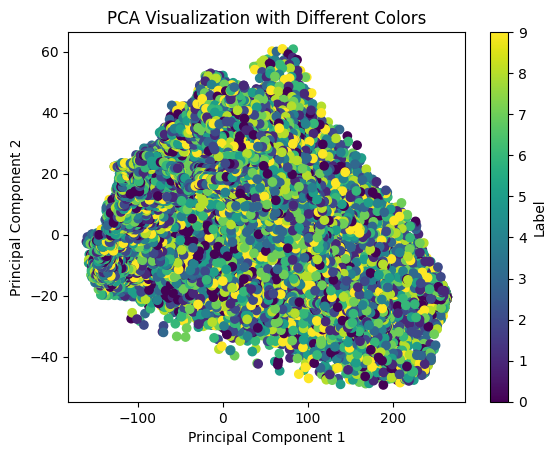

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have 'flattened_images' and 'labels' defined earlier

# Reshape images to vectors
flattened_images = example_image.reshape(-1, example_image.shape[-1])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_images)

# Assuming 'labels' is a list or array of numeric values
# If 'labels' is not defined, replace it with the appropriate variable containing the labels
labels = np.random.randint(0, 10, size=len(pca_result))  # Example: random labels for demonstration

# Plotting the PCA results with different colors based on 'labels'
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis')
plt.colorbar(label='Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization with Different Colors')
plt.show()

**Corelation Analysis**

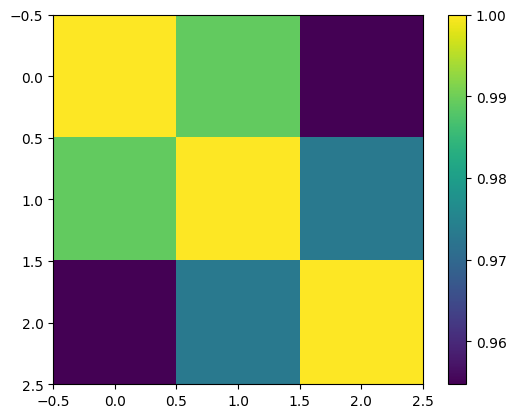

In [59]:
# Example: Compute correlation matrix
correlation_matrix = np.corrcoef(flattened_images.T)
plt.imshow(correlation_matrix, cmap='viridis')
plt.colorbar()
plt.show()

**Outlier Detection**

In [60]:
# Example: Z-score outlier detection
z_scores = (flattened_images - mean_pixel) / std_pixel
outliers = np.where(np.abs(z_scores) > 3)

print("Outlier indices:", outliers)

Outlier indices: (array([], dtype=int64), array([], dtype=int64))


**Label Analysis**

In [61]:
# Example: Check for unique labels
unique_labels = set(labels)
print("Unique labels:", unique_labels)

Unique labels: {np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9)}


**Create Folder**

In [62]:
import os
import shutil

# Define the source paths of the subfolders
source_folders = [
    "resized_images_of_Abnormal",
    "resized_images_of_Normal",
    "resized_images_of_Infection",
    "resized_images_of_Ischaemia"
]

# Define the path for the new directory
new_directory = "Train_resized_images"

# Create the new directory
os.makedirs(new_directory, exist_ok=True)

# Move the subfolders into the new directory
for folder in source_folders:
    if os.path.exists(folder):
        shutil.move(folder, new_directory)
    else:
        print(f"Folder {folder} does not exist.")

print(f"All folders have been moved to {new_directory}.")


All folders have been moved to Train_resized_images.


Data Augmentation with Image Generator

In [63]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import os

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,       # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,   # Randomly shift images horizontally by 20%
    height_shift_range=0.2,  # Randomly shift images vertically by 20%
    shear_range=0.2,         # Shear images by 20%
    zoom_range=0.2,          # Randomly zoom into images by 20%
    horizontal_flip=True,    # Randomly flip images horizontally
    fill_mode='nearest'      # Fill in missing pixels
)

# Path to the directories
train_dirs = ['Train_resized_images/resized_images_of_Abnormal', 
              'Train_resized_images/resized_images_of_Normal'
            #   'Train_resized_images/resized_images_of_Infection',
            #   'Train_resized_images/resized_images_of_Ischaemia'
            ]

# Number of samples you want to achieve per class
target_samples_per_class = 2000

for dir in train_dirs:
    # Get the list of image file paths in the directory
    image_files = [os.path.join(dir, f) for f in os.listdir(dir) if f.endswith('.jpg')]

    # Calculate how many times we need to augment the data
    existing_samples = len(image_files)
    augment_factor = target_samples_per_class // existing_samples

    # Load images and augment them
    for image_path in image_files:
        img = load_img(image_path)  # Load image
        x = img_to_array(img)       # Convert to array
        x = x.reshape((1,) + x.shape)  # Reshape

        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=dir, save_prefix='aug', save_format='jpg'):
            i += 1
            if i >= augment_factor:
                break  # Stop when we have enough augmented images

## **Apply SMOTE with ENN**

In [64]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
import numpy as np
import os

# Load pre-trained VGG16 without the top layer
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

# Batch feature extraction
def extract_features_batch(image_dirs, batch_size=32):
    features = []
    labels = []
    for label, sub_dir in enumerate(image_dirs):
        image_files = [os.path.join(sub_dir, f) for f in os.listdir(sub_dir) if f.endswith('.jpg')]
        n_batches = len(image_files) // batch_size + int(len(image_files) % batch_size != 0)
        
        for i in range(n_batches):
            batch_files = image_files[i * batch_size:(i + 1) * batch_size]
            batch_images = []
            for image_path in batch_files:
                img = load_img(image_path, target_size=(224, 224))
                img_array = img_to_array(img)
                img_array /= 255.0  # Normalize
                batch_images.append(img_array)
            batch_images = np.array(batch_images)
            
            # Extract features
            batch_features = model.predict(batch_images)
            batch_features = batch_features.reshape(batch_features.shape[0], -1)
            features.append(batch_features)
            labels.extend([label] * len(batch_files))
    return np.vstack(features), np.array(labels)

# Extract features in batches
X, y = extract_features_batch(train_dirs, batch_size=32)


from imblearn.over_sampling import SMOTE

# Apply SMOTE to extracted features
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


from imblearn.combine import SMOTEENN

# Apply SMOTE + ENN
smote_enn = SMOTEENN(sampling_strategy='auto', random_state=42)
X_resampled_enn, y_resampled_enn = smote_enn.fit_resample(X_resampled, y_resampled)


from sklearn.decomposition import PCA
import cv2

# Reduce dimensionality back to image size
pca = PCA(n_components=224 * 224 * 3)
X_reduced = pca.inverse_transform(X_resampled_enn).reshape(-1, 224, 224, 3)

# Save resampled images in batches
def save_images_in_batches(X, y, output_dirs, batch_size=32):
    for i in range(0, len(X), batch_size):
        batch_X = X[i:i + batch_size]
        batch_y = y[i:i + batch_size]
        for j, (image_array, label) in enumerate(zip(batch_X, batch_y)):
            folder = output_dirs[label]
            os.makedirs(folder, exist_ok=True)
            image_path = os.path.join(folder, f"smote_enn_aug_{i + j}.jpg")
            cv2.imwrite(image_path, (image_array * 255).astype(np.uint8))

save_images_in_batches(X_reduced, y_resampled_enn, train_dirs, batch_size=32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━

AttributeError: 'PCA' object has no attribute 'components_'

In [65]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.decomposition import PCA
import cv2

# Define train directories (list of subfolder paths, one per class)
train_dirs = ["Train_resized_images/resized_images_of_Abnormal", 
              "Train_resized_images/resized_images_of_Infection",
              "Train_resized_images/resized_images_of_Ischaemia",
              "Train_resized_images/resized_images_of_Normal"]  # Update paths accordingly

# Load pre-trained VGG16 without the top layer
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

# Batch feature extraction
def extract_features_batch(image_dirs, batch_size=32):
    features, labels = [], []
    for label, sub_dir in enumerate(image_dirs):
        image_files = [os.path.join(sub_dir, f) for f in os.listdir(sub_dir) if f.endswith('.jpg')]
        n_batches = len(image_files) // batch_size + int(len(image_files) % batch_size != 0)
        
        for i in range(n_batches):
            batch_files = image_files[i * batch_size:(i + 1) * batch_size]
            batch_images = []
            for image_path in batch_files:
                img = load_img(image_path, target_size=(224, 224))
                img_array = img_to_array(img) / 255.0  # Normalize
                batch_images.append(img_array)
            batch_images = np.array(batch_images)
            
            # Extract features
            batch_features = model.predict(batch_images)
            batch_features = batch_features.reshape(batch_features.shape[0], -1)
            features.append(batch_features)
            labels.extend([label] * len(batch_files))
    return np.vstack(features), np.array(labels)

# Extract features in batches
X, y = extract_features_batch(train_dirs, batch_size=32)

# Apply SMOTE to extracted features
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Apply SMOTE + ENN
smote_enn = SMOTEENN(sampling_strategy='auto', random_state=42)
X_resampled_enn, y_resampled_enn = smote_enn.fit_resample(X_resampled, y_resampled)

# Reduce dimensionality using PCA and reshape
pca = PCA(n_components=224 * 224 * 3)  # Adjust components as needed
X_reduced = pca.inverse_transform(X_resampled_enn).reshape(-1, 224, 224, 3)

# Save resampled images
def save_images_in_batches(X, y, output_dirs, batch_size=32):
    for i in range(0, len(X), batch_size):
        batch_X, batch_y = X[i:i + batch_size], y[i:i + batch_size]
        for j, (image_array, label) in enumerate(zip(batch_X, batch_y)):
            folder = output_dirs[label]
            os.makedirs(folder, exist_ok=True)
            image_path = os.path.join(folder, f"smote_enn_aug_{i + j}.jpg")
            cv2.imwrite(image_path, (image_array * 255).astype(np.uint8))

# Ensure output directories exist and map classes
output_dirs = [f"augmented_class_{i}" for i in range(len(train_dirs))]
save_images_in_batches(X_reduced, y_resampled_enn, output_dirs, batch_size=32)


1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
1/1 ━━━━━━━━

AttributeError: 'PCA' object has no attribute 'components_'

In [67]:
from sklearn.model_selection import train_test_split
import shutil

# Define the base directory where the augmented data is stored
base_dirs = ['Train_resized_images/resized_images_of_Abnormal', 
             'Train_resized_images/resized_images_of_Normal',
             'Train_resized_images/resized_images_of_Infection',
             'Train_resized_images/resized_images_of_Ischaemia']

# Directories for train, test, validation
output_dirs = {
    'train': 'Split_data/train',
    'test': 'Split_data/test',
    'val': 'Split_data/val'
}

# Ensure output directories exist
for split_dir in output_dirs.values():
    for class_dir in base_dirs:
        os.makedirs(os.path.join(split_dir, os.path.basename(class_dir)), exist_ok=True)

# Split function to move data
def split_and_save_data(base_dirs, output_dirs, train_size=0.7, test_val_size=0.15):
    for class_dir in base_dirs:
        # Get all images for the current class
        all_images = [os.path.join(class_dir, f) for f in os.listdir(class_dir) if f.endswith('.jpg')]
        
        # Split into train and temp (test + validation)
        train_images, temp_images = train_test_split(all_images, train_size=train_size, random_state=42)
        
        # Split temp into test and validation
        test_images, val_images = train_test_split(temp_images, test_size=0.5, random_state=42)
        
        # Copy images to their respective directories
        for image_path in train_images:
            shutil.copy(image_path, os.path.join(output_dirs['train'], os.path.basename(class_dir)))
        for image_path in test_images:
            shutil.copy(image_path, os.path.join(output_dirs['test'], os.path.basename(class_dir)))
        for image_path in val_images:
            shutil.copy(image_path, os.path.join(output_dirs['val'], os.path.basename(class_dir)))

# Apply the splitting function
split_and_save_data(base_dirs, output_dirs)

In [69]:
from sklearn.decomposition import PCA
import numpy as np

# Assuming X_resampled_enn exists and contains the processed images
X_resampled_enn = np.array(X_resampled_enn)  # Replace with your actual variable

# Apply PCA to reduce dimensions
pca = PCA(n_components=100)  # Adjust n_components based on dataset size and requirements
X_reduced = pca.fit_transform(X_resampled_enn)

print("PCA applied successfully. X_reduced shape:", X_reduced.shape)


PCA applied successfully. X_reduced shape: (13284, 100)


In [70]:
from sklearn.model_selection import train_test_split
import os

# Convert labels to numpy array
y_resampled_enn = np.array(y_resampled_enn)

# Split the data into training (70%) and temporary (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_reduced, y_resampled_enn, test_size=0.3, random_state=42, stratify=y_resampled_enn
)

# Split temporary into test (15%) and validation (15%)
X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Create directories to save data
output_dir = "splitted_data"
os.makedirs(output_dir, exist_ok=True)

np.save(os.path.join(output_dir, "X_train.npy"), X_train)
np.save(os.path.join(output_dir, "y_train.npy"), y_train)
np.save(os.path.join(output_dir, "X_test.npy"), X_test)
np.save(os.path.join(output_dir, "y_test.npy"), y_test)
np.save(os.path.join(output_dir, "X_val.npy"), X_val)
np.save(os.path.join(output_dir, "y_val.npy"), y_val)

print("Data saved successfully in 'splitted_data' directory.")

Data saved successfully in 'splitted_data' directory.


In [ ]:
import os
import numpy as np
from keras.preprocessing.image import img_to_array, load_img, array_to_img
from keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
import pickle  # To save processed datasets

# Function to load and preprocess images in batches
def load_and_preprocess_images_batch(image_files, target_size=(224, 224), batch_size=32):
    for i in range(0, len(image_files), batch_size):
        batch_files = image_files[i:i+batch_size]
        images = []
        for image_path in batch_files:
            img = load_img(image_path, target_size=target_size)
            img_array = img_to_array(img)
            img_array = preprocess_input(img_array)
            images.append(img_array)
        yield np.array(images)

# Function to retrieve all image files in subdirectories
def get_all_image_files(root_dir, extensions=('.jpg',)):
    image_files = []
    for subdir, _, files in os.walk(root_dir):
        for file in files:
            if file.lower().endswith(extensions):
                image_files.append(os.path.join(subdir, file))
    return image_files

# Save datasets to pickle files
def save_data(data, filename, output_dir="processed_datasets"):
    os.makedirs(output_dir, exist_ok=True)
    with open(os.path.join(output_dir, filename), 'wb') as f:
        pickle.dump(data, f)

# Save images into class-labeled folders
def save_images_to_folders(original_images, labels, folder_name):
    class_folders = {0: "Abnormal", 1: "Normal", 2: "Infection", 3: "Ischaemia"}
    os.makedirs(folder_name, exist_ok=True)
    for class_id, class_name in class_folders.items():
        os.makedirs(os.path.join(folder_name, class_name), exist_ok=True)
    for i, (img_array, label) in enumerate(zip(original_images, labels)):
        if img_array.ndim == 3:  # Check if the image has the correct shape
            img = array_to_img(img_array)
            class_folder = os.path.join(folder_name, class_folders[label])
            img.save(os.path.join(class_folder, f"image_{i}.jpg"))
        else:
            print(f"Skipping image {i}: Invalid shape {img_array.shape}")

# Root folder containing the resized images
folder_path = 'Train_resized_images'
image_files = get_all_image_files(folder_path)

# Load the VGG16 model without the top layer for feature extraction
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Filter out images with None labels and generate labels
labels = []
filtered_image_files = []
for img in image_files:
    if "resized_images_of_Abnormal" in img:
        labels.append(0)
        filtered_image_files.append(img)
    elif "resized_images_of_Normal" in img:
        labels.append(1)
        filtered_image_files.append(img)
    elif "resized_images_of_Infection" in img:
        labels.append(2)
        filtered_image_files.append(img)
    elif "resized_images_of_Ishaemia" in img:
        labels.append(3)
        filtered_image_files.append(img)
    else:
        print(f"Warning: No label assigned for image: {img}")

# Update image_files and labels
image_files = filtered_image_files

# Verify lengths
print(f"Number of image files: {len(image_files)}")
print(f"Number of labels: {len(labels)}")

# Extract features in batches of 32
features = []
batch_size = 32
for image_batch in load_and_preprocess_images_batch(image_files, batch_size=batch_size):
    batch_features = vgg16_model.predict(image_batch)
    features.append(batch_features)

# Combine the features and flatten them for further processing
features = np.vstack(features)
features_flattened = features.reshape(features.shape[0], -1)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=100, random_state=42)
features_pca = pca.fit_transform(features_flattened)

# Combine SMOTE and ENN for resampling
smote_enn = SMOTEENN(random_state=42)
features_resampled, labels_resampled = smote_enn.fit_resample(features_pca, labels)

# Split data into training, validation, and testing sets (70%, 15%, 15%)
X_train, X_temp, y_train, y_temp = train_test_split(
    features_resampled, labels_resampled, test_size=0.3, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Save the datasets
save_data((X_train, y_train), "train.pkl")
save_data((X_val, y_val), "validation.pkl")
save_data((X_test, y_test), "test.pkl")

print("Datasets saved successfully!")
print(f"Training samples: {len(y_train)}, Validation samples: {len(y_val)}, Testing samples: {len(y_test)}")

# Save images into train, validation, and test folders
save_images_to_folders(X_train, y_train, "Train_Images")
save_images_to_folders(X_val, y_val, "Validation_Images")
save_images_to_folders(X_test, y_test, "Test_Images")

print("Images saved successfully!")

Number of image files: 7359
Number of labels: 7359
1/1 ━━━━━━━━━━━━━━━━━━━━ 23s 23s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step

# Apply SimCLR Model

In [1]:
pip install torch

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install torch torchvision

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install torch torchvision torchaudio

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [5]:
pip install torch torchvision

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [42]:
# Import libraries
import torch
import numpy as np
from torch import nn
import torch.nn.functional as F
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load datasets
X_train = np.load('splitted_data/X_train.npy')
y_train = np.load('splitted_data/y_train.npy')
X_val = np.load('splitted_data/X_val.npy')
y_val = np.load('splitted_data/y_val.npy')
X_test = np.load('splitted_data/X_test.npy')
y_test = np.load('splitted_data/y_test.npy')

# Normalize the datasets
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean) / std
X_val = (X_val - mean) / std
X_test = (X_test - mean) / std

# Convert datasets to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_val = torch.tensor(y_val, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Data augmentation for tabular data
def augment_data(X, noise_factor=0.1):
    X_noisy = X + noise_factor * torch.randn_like(X)
    X_masked = X.clone()
    mask = torch.rand_like(X_masked) < 0.1
    X_masked[mask] = 0
    return X_noisy, X_masked

# Define the encoder
class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

# Define the projection head
class ProjectionHead(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(ProjectionHead, self).__init__()
        self.fc1 = nn.Linear(input_dim, output_dim)
        self.fc2 = nn.Linear(output_dim, output_dim)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        return self.fc2(x)

# Define SimCLR model
class SimCLR(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, projection_dim):
        super(SimCLR, self).__init__()
        self.encoder = Encoder(input_dim, hidden_dim, output_dim)
        self.projection_head = ProjectionHead(output_dim, projection_dim)
    
    def forward(self, x):
        h = self.encoder(x)
        z = self.projection_head(h)
        return h, z

# Contrastive Loss (NT-Xent Loss)
def nt_xent_loss(z_i, z_j, temperature=0.5):
    batch_size = z_i.shape[0]
    z_i = F.normalize(z_i, dim=1)
    z_j = F.normalize(z_j, dim=1)
    representations = torch.cat([z_i, z_j], dim=0)

    similarity_matrix = torch.matmul(representations, representations.T)
    sim_ij = torch.diag(similarity_matrix, batch_size)
    sim_ji = torch.diag(similarity_matrix, -batch_size)

    positives = torch.cat([sim_ij, sim_ji], dim=0)
    negatives_mask = torch.ones_like(similarity_matrix) - torch.eye(2 * batch_size).to(similarity_matrix.device)
    negatives = torch.exp(similarity_matrix / temperature) * negatives_mask
    denominator = torch.sum(negatives, dim=1)
    
    loss = -torch.log(torch.exp(positives / temperature) / denominator)
    return loss.mean()

# Initialize SimCLR
input_dim = X_train.shape[1]
hidden_dim = 128
output_dim = 64
projection_dim = 32

model = SimCLR(input_dim, hidden_dim, output_dim, projection_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
temperature = 0.5
epochs = 100
batch_size = 128

# Train SimCLR
def train_simclr(model, X_train, epochs, batch_size, temperature):
    model.train()
    dataset = torch.utils.data.TensorDataset(X_train)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    for epoch in range(epochs):
        total_loss = 0
        for batch in dataloader:
            X_batch = batch[0]
            X1, X2 = augment_data(X_batch)
            _, z1 = model(X1)
            _, z2 = model(X2)
            loss = nt_xent_loss(z1, z2, temperature)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss / len(dataloader)}")

train_simclr(model, X_train, epochs, batch_size, temperature)

# Extract features
def extract_features(model, X):
    model.eval()
    with torch.no_grad():
        h = model.encoder(X)
    return h

X_train_features = extract_features(model, X_train).numpy()
X_val_features = extract_features(model, X_val).numpy()
X_test_features = extract_features(model, X_test).numpy()


Epoch 1/100, Loss: 4.674473311803112
Epoch 2/100, Loss: 3.9364020726452136
Epoch 3/100, Loss: 3.8879834625818956
Epoch 4/100, Loss: 3.862300343709449
Epoch 5/100, Loss: 3.8491725464389748
Epoch 6/100, Loss: 3.837001470670308
Epoch 7/100, Loss: 3.8256016496109635
Epoch 8/100, Loss: 3.8164346610030084
Epoch 9/100, Loss: 3.806233628155434
Epoch 10/100, Loss: 3.8028361829992843
Epoch 11/100, Loss: 3.7914032217574447
Epoch 12/100, Loss: 3.786418088494915
Epoch 13/100, Loss: 3.780379112452677
Epoch 14/100, Loss: 3.7804814266831905
Epoch 15/100, Loss: 3.7802230887217063
Epoch 16/100, Loss: 3.7731559603181606
Epoch 17/100, Loss: 3.767600043179238
Epoch 18/100, Loss: 3.7676035965958685
Epoch 19/100, Loss: 3.76484691606809
Epoch 20/100, Loss: 3.762903491111651
Epoch 21/100, Loss: 3.7581702617749775
Epoch 22/100, Loss: 3.758038586133147
Epoch 23/100, Loss: 3.7557323305574184
Epoch 24/100, Loss: 3.752900616763389
Epoch 25/100, Loss: 3.752394914627075
Epoch 26/100, Loss: 3.751081022497726
Epoch 27/

# Apply Logistic Regression

In [10]:
# Train logistic regression classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_features, y_train)

# Evaluate the classifier
y_val_pred = classifier.predict(X_val_features)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

y_test_pred = classifier.predict(X_test_features)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Validation Accuracy: 80.13%
Test Accuracy: 79.48%


In [49]:
import pickle

# Save the entire model (including the structure and weights) in a .pkl file
with open('simclr_model.pkl', 'wb') as f:
    pickle.dump(model, f)


# Apply Random Forest

In [11]:
import numpy as np
import torch
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load the datasets
X_train = np.load('splitted_data/X_train.npy')
y_train = np.load('splitted_data/y_train.npy')
X_val = np.load('splitted_data/X_val.npy')
y_val = np.load('splitted_data/y_val.npy')
X_test = np.load('splitted_data/X_test.npy')
y_test = np.load('splitted_data/y_test.npy')

# Normalize the data (if needed)
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_val = (X_val - np.mean(X_val, axis=0)) / np.std(X_val, axis=0)
X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

# Convert datasets to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Extract features using the trained SimCLR model
X_train_features = extract_features(model, X_train_tensor).numpy()
X_val_features = extract_features(model, X_val_tensor).numpy()
X_test_features = extract_features(model, X_test_tensor).numpy()

# Split the training set for classifier training and validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_features, y_train, test_size=0.15, random_state=42
)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_split, y_train_split)

# Compute training accuracy
y_pred_train_rf = rf_model.predict(X_train_split)
train_accuracy_rf = accuracy_score(y_train_split, y_pred_train_rf)
print(f"Train Accuracy with Random Forest: {train_accuracy_rf * 100:.2f}%")

# Compute validation accuracy
y_pred_val_rf = rf_model.predict(X_val_split)
val_accuracy_rf = accuracy_score(y_val_split, y_pred_val_rf)
print(f"Validation Accuracy with Random Forest: {val_accuracy_rf * 100:.2f}%")

# Compute test accuracy
y_pred_test_rf = rf_model.predict(X_test_features)
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
print(f"Test Accuracy with Random Forest: {test_accuracy_rf * 100:.2f}%")


Train Accuracy with Random Forest: 100.00%
Validation Accuracy with Random Forest: 89.96%
Test Accuracy with Random Forest: 89.31%


# Save and Load model

In [13]:
import joblib

In [ ]:
# Save the trained Random Forest model to a .pkl file
joblib.dump(rf_model, 'random_forest_model.pkl')
print("Model saved successfully.")


Model saved successfully.


In [14]:
# To load the model back into memory
rf_model_loaded = joblib.load('random_forest_model.pkl')
print("Model loaded successfully.")

# Use the loaded model for predictions
y_pred_test_rf = rf_model_loaded.predict(X_test_features)
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
print(f"Test Accuracy with Loaded Random Forest: {test_accuracy_rf * 100:.2f}%")


Model loaded successfully.
Test Accuracy with Loaded Random Forest: 30.71%


C:\Users\Student\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Student\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.5.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


# Test Model

In [15]:
import numpy as np
import torch
from sklearn.metrics import accuracy_score
import joblib

# Load test image data (update the path as needed)
X_test = np.load('splitted_data/X_test.npy')
y_test = np.load('splitted_data/y_test.npy')

# Convert test images to PyTorch tensor
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Load the trained SimCLR model
# Ensure `model` is properly defined with the same architecture used during training
# Load the trained Random Forest model
rf_model = joblib.load('random_forest_model.pkl')
print("Random Forest model loaded successfully.")

# Define feature extraction function (if not defined already)
def extract_features(model, X):
    model.eval()
    with torch.no_grad():
        h = model.encoder(X)
    return h

# Extract features from test images
X_test_features = extract_features(model, X_test_tensor)

# Make predictions on test data
y_pred_test = rf_model.predict(X_test_features.numpy())

# Calculate accuracy on test data
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict class for a single image (e.g., X_test[0])
single_image = X_test[0]
single_image_tensor = torch.tensor(single_image, dtype=torch.float32).unsqueeze(0)  # Add batch dimension
single_feature = extract_features(model, single_image_tensor)
single_prediction = rf_model.predict(single_feature.numpy())
print(f"Predicted class for single image: {single_prediction[0]}")


Random Forest model loaded successfully.
Test Accuracy: 30.36%
Predicted class for single image: 0


C:\Users\Student\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Student\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.5.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


# Grid Search

In [18]:
print(f"Shape of X_train_features: {X_train_features.shape}")
print(f"Shape of y_train_split: {y_train_split.shape}")


Shape of X_train_features: (9298, 64)
Shape of y_train_split: (7903,)


In [19]:
from sklearn.model_selection import train_test_split

X_train_features, X_val_features, y_train_split, y_val_split = train_test_split(
    X_train_features, y_train, test_size=0.15, random_state=42
)


In [20]:
assert len(X_train_features) == len(y_train_split), "Feature and label counts do not match!"


In [21]:
print(f"Initial X_train shape: {X_train.shape}")
print(f"Feature extraction output shape: {X_train_features.shape}")


Initial X_train shape: (9298, 100)
Feature extraction output shape: (7903, 64)


In [22]:
min_samples = min(len(X_train_features), len(y_train_split))
X_train_features = X_train_features[:min_samples]
y_train_split = y_train_split[:min_samples]


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_features, y_train_split)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}


In [25]:
rf_model = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf_model.fit(X_train_features, y_train_split)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

# Apply XGBoost

In [26]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_features, y_train_split)
y_pred_xgb = xgb_model.predict(X_val_features)
accuracy_xgb = accuracy_score(y_val_split, y_pred_xgb)
print(f"XGBoost Validation Accuracy: {accuracy_xgb * 100:.2f}%")


C:\Users\Student\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [13:45:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Validation Accuracy: 90.04%


# Apply EfficientNetB0

Import Libraries

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

Data Generator

In [ ]:
train_dir = 'Split_data/train'
validation_dir = 'Split_data/val'
test_dir = 'Split_data/test'

train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_val_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for test set to evaluate model properly
)


Found 8608 images belonging to 4 classes.
Found 1847 images belonging to 4 classes.
Found 1845 images belonging to 4 classes.


Model Definition and Compilation

In [ ]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model initially

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 18s 1us/step


Model Training

In [31]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator
)


C:\Users\Student\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 337s 1s/step - accuracy: 0.7334 - loss: 0.6544 - val_accuracy: 0.8305 - val_loss: 0.4557
Epoch 2/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 250s 928ms/step - accuracy: 0.8426 - loss: 0.3864 - val_accuracy: 0.8571 - val_loss: 0.3892
Epoch 3/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 250s 930ms/step - accuracy: 0.8580 - loss: 0.3547 - val_accuracy: 0.8544 - val_loss: 0.3840
Epoch 4/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 251s 933ms/step - accuracy: 0.8660 - loss: 0.3395 - val_accuracy: 0.8592 - val_loss: 0.3712
Epoch 5/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 251s 934ms/step - accuracy: 0.8809 - loss: 0.3130 - val_accuracy: 0.8733 - val_loss: 0.3434
Epoch 6/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 252s 938ms/step - accuracy: 0.8854 - loss: 0.2974 - val_accuracy: 0.8636 - val_loss: 0.3467
Epoch 7/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 253s 938ms/step - accuracy: 0.8900 - loss: 0.2937 - val_accuracy: 0.8728 - val_loss: 0.3372
Epoch 8/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 252s 938ms/step - accuracy: 0.8981 - lo

Test Accuracy

In [57]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy}")

58/58 ━━━━━━━━━━━━━━━━━━━━ 35s 537ms/step - accuracy: 0.8605 - loss: 0.4061
Test Accuracy: 0.8943089246749878


Save Model

In [33]:
model.save('EfficeintNetB0.h5')  # Saves the model architecture and weights

Image Loading and Preprocessing

In [58]:
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image according to EfficientNet standards
    return img_array


Load Model

In [59]:
from tensorflow.keras.models import load_model

# Load the previously saved model
model = load_model('EfficeintNetB0.h5')


Predict Image Class

In [62]:
from tensorflow.keras.applications.efficientnet import preprocess_input

In [81]:
def predict_image_class(img_path, model, class_indices, threshold=0.6):
    """
    Predict the class of an image. If the model's confidence is below the threshold, classify as "Unknown".
    
    Args:
        img_path (str): Path to the input image.
        model (Model): Trained model to use for prediction.
        class_indices (dict): Class indices from the training data.
        threshold (float): Confidence threshold for determining if the prediction is "Unknown".
    
    Returns:
        str: Predicted class label or "Unknown".
    """
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image according to EfficientNet standards

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)  # Index of the highest probability
    confidence = np.max(predictions)  # Highest probability value

    # Get the class labels (only actual class names, not folder names)
    labels = {0: "Abnormal", 1: "Infection", 2: "Ischaemia", 3: "Normal"}

    # Check confidence threshold
    if confidence < threshold:
        return "Unknown"  # Confidence is below the threshold
    else:
        return labels[predicted_class_index[0]]  # Return the predicted class label


# Assuming that you have `train_generator.class_indices` and it correctly maps to the actual classes
class_indices = train_generator.class_indices

# Test image
img_path = 'Split_data/test/resized_images_of_Infection/resized_image_2920.jpg'  # Provide a path to an image not in your training classes
predicted_class = predict_image_class(img_path, model, class_indices, threshold=0.7)
print(f"Predicted class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted class: Infection


Save Model

In [64]:
# Save model in .keras format
model.save("infer_model.keras")


Load Model

In [82]:
# Load the saved model
loaded_model = load_model("infer_model.keras")


C:\Users\Student\AppData\Roaming\Python\Python39\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


# Evaluate Performance Metrics

Load the Model

In [83]:
from tensorflow.keras.models import load_model

model = load_model('infer_model.keras')


Prepare the Test Data

In [84]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input

test_dir = 'Split_data/test'  # Path to your test dataset

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important to keep data in same order as labels
)


Found 1845 images belonging to 4 classes.


Evaluate the Model

In [85]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


C:\Users\Student\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 33s 507ms/step - accuracy: 0.8605 - loss: 0.4061
Test Loss: 0.31779229640960693
Test Accuracy: 0.8943089246749878


Calculate Additional Metrics

In [87]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict classes with the model
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Generate a classification report
class_labels = ["Abnormal", "Infection", "Ischaemia", "Normal"]
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


58/58 ━━━━━━━━━━━━━━━━━━━━ 31s 541ms/step
              precision    recall  f1-score   support

    Abnormal       0.96      0.93      0.94       304
   Infection       0.90      0.70      0.79       442
   Ischaemia       0.84      0.96      0.90       740
      Normal       0.96      0.96      0.96       359

    accuracy                           0.89      1845
   macro avg       0.92      0.89      0.90      1845
weighted avg       0.90      0.89      0.89      1845



Visualize the Confusion Matrix

In [88]:
pip install seaborn


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


C:\Users\Student\AppData\Roaming\Python\Python39\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


58/58 ━━━━━━━━━━━━━━━━━━━━ 35s 577ms/step


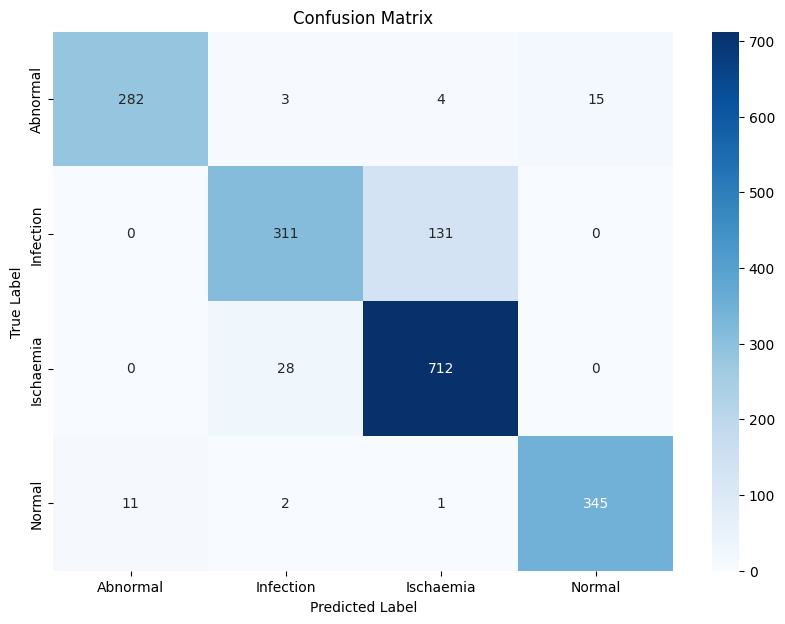

In [90]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load model
model = load_model('infer_model.keras')

# Predict using the test generator
predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# True classes
true_classes = test_generator.classes

# Shortened class labels
class_labels = ["Abnormal", "Infection", "Ischaemia", "Normal"]

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Save Confusion Matrix
df_cm = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
df_cm.to_csv('confusion_matrix.csv')

# Visualize Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
